# Cadena periódica de N osciladores acoplados

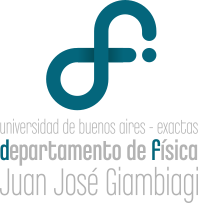  
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  
----

Bibliografía:  
- Sección 3.1  
  [Ondas](http://bit.ly/F2Depinev02)  
  Ricardo Depine   
  v.5, 2020

# Enunciado
Enlazadas por resortes de coeficiente de dureza $k$ y longitud natural $l_0$ unas $N$ partículas de masa $m$ en reposo están equiespaciadas en $a$.  
![](figuras/ej1-11.png)
1. Escriba la ecuación de movimiento transversal para la partícula enésima usando la aproximación de ángulos pequeños.
2. Proponga una solución de la forma:
	\\[
		\Psi_{n}^{(p)}(t)=A^{(p)}\cos\left(nk^{(p)}a+\alpha^{(p)}\right)\cos\left(\omega^{(p)}t+\phi^{(p)}\right)
	\\]
	Halle la relación de dispersión y grafíquela.
	¿Depende esta relación de las condiciones de contorno?
	¿Cuánto vale la frecuencia más baja?
	¿Qué representa dicho modo? 
1.  En la figura se muestra el caso de extremos fijos en que una virtual partícula $n=0$ estaría en la pared izquierda y una $n= N+1$ en la derecha.
    Obtenga las frecuencias correspondientes a los modos normales de oscilación transversal para este y escriba la solución general para la partícula enésima. 
1. Ídem. anterior, pero con ambos extremos están libres (atención: ¿cómo sería un _extremo libre_ en esta configuración?).
1. (*) Ídem. anterior, pero con el extremo izquierdo libre y el derecho fijo a la pared. 
1. Particularice los resultados de 3, 4 y 5 para el caso en que \(N = 3\).

# Resolución

## Ecuaciones de movimiento

Excepto las partículas en la extrema izquierda y derecha de la cadena, \\(n=1\\) y \\(n=N\\), todas las fuerzas que actuan son producto del potencial

In [1]:
import sympy as sym
from sympy.physics.mechanics import init_vprinting
init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
t = sym.Symbol('t')
k= sym.Symbol('k', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\Psi_{n}')(t)
psi_nPlus = sym.Function('\Psi_{n+1}')(t)

V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* ( (psi_nPlus- psi_n)**2 + (psi_n- psi_nMinus)**2 ) 
          )
V

Entonces las fuerzas sobre la enésima partícula es

In [3]:
m = sym.Symbol('m', positive=True) # parámetros físicos
sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n) ) 

In [4]:
newton_n = sym.Eq(m* psi_n.diff(t,2),  V.rhs.diff(psi_n).simplify() ) 
newton_n

## Modos normales

Estas formulaciones de la 2.a ley de Newton para las \\(N\\) partículas pueden escribirse en forma matricial
\\[
  m \ddot{\vec{\Psi}} 
  = m \begin{bmatrix} \vdots\\ \ddot{\Psi}_{n+1}\\ \ddot{\Psi}_{n}\\ \ddot{\Psi}_{n+1}\\ \vdots \end{bmatrix} 
  = \begin{bmatrix}
  & & \vdots & & & & \\
  \dots & k & -2k & k & & & \\
  & & k & -2k & k & & \\
  & & & k & -2k & k & \dots \\
  & & & & & \vdots & & \\
  \end{bmatrix}
  \begin{bmatrix} \vdots\\ \Psi_{n+1}\\ \Psi_{n}\\ \Psi_{n+1}\\ \vdots  \end{bmatrix} 
  = \mathbb{K} \vec{\Psi}.
\\]
Luego proponiamos una solución exponencial con la misma frecuencia para cada una de las \\(n\\) partículas 
\\[
  \begin{bmatrix} \vdots\\ \Psi_{n+1}\\ \Psi_{n}\\ \Psi_{n+1}\\ \vdots \end{bmatrix} = 
  \begin{bmatrix} \vdots\\ A_{n+1}\\ A_{n}\\ A_{n+1}\\ \vdots \end{bmatrix}
    \operatorname{e}^{i \omega t}
\\]
donde \\(A_i\\) son las amplitudes de dichas oscilaciones.
Reemplazar esta solución en lo anterior nos llevará a tener que resolver un determinante igualado a \\(0\\).
Esto que hicimos para \\(N=2\\) y \\(N=3\\) podría ser insoportablemente tedioso para \\(N\gg 1\\).

### Relación de dispersión

Hacemos otra cosa.
Dado que hay \\(N\\) partículas el método anterior halla sendas soluciones reales, funciones trigonométricas, para los modos en que todas las partículas oscilan con idéntica frencuencia \\(\omega\\) y fase \\(\phi\\).
En estos \\(p\\) modos, entre los \\(N\\) posibles, la partícula \\(n\\) se mueve según

In [6]:
A_p_n  = sym.Symbol('A_n^{(p)}')
omega_p = sym.Symbol('\omega^{(p)}')
phi_p = sym.Symbol('\phi^{(p)}')
psi_p_n = sym.Eq(sym.Symbol('\Psi_n^{(p)}'), A_p_n* sym.cos(omega_p * t + phi_p ) )
psi_p_n

donde \\(A_n^{(p)}\\) es la amplitud para la párticula \\(n\\).
Ídem. para las partículas vecinas \\(n-1\\) y \\(n+1\\).

In [7]:
A_p_nMinus, A_p_nPlus  = sym.symbols('A_{n-1}^{(p)}, A_{n+1}^{(p)}')
psi_p_nPlus = sym.Eq(sym.Symbol('\Psi_{n+1}^{(p)}'), A_p_nPlus* sym.cos(omega_p * t + phi_p ) )
psi_p_nMinus = sym.Eq(sym.Symbol('\Psi_{n-1}^{(p)}'), A_p_nMinus* sym.cos(omega_p * t + phi_p ) )
psi_p_nPlus, psi_p_nMinus

Se impone tal solución en la 2.a ecuación de Newton para la partícula \\(n\\)

In [33]:
newton_n

y se obtiene

In [36]:
# A_n  = sym.Symbol('A_n')
# omega = sym.Symbol('\omega', positive=True) # parámetros físicos
# newton_n.subs(psi_n, A_n* sym.exp(sym.I* omega* t))
newton_substituciones={
    psi_n: psi_p_n.rhs,
    psi_nMinus: psi_p_nMinus.rhs,
    psi_nPlus: psi_p_nPlus.rhs,
}
newton_substituido = newton_n.subs(newton_substituciones).simplify()
newton_substituido

De aquí puede despejarse una **relación recursiva de amplitudes**

In [38]:
newton_substituidoPaso1 = sym.Eq( newton_substituido.lhs/sym.cos(omega_p * t + phi_p ),
                             newton_substituido.rhs/sym.cos(omega_p * t + phi_p )
                            ).expand()
newton_substituidoPaso1

Se efectua la substitución \\(\omega_0^2 = \frac{k}{m}\\)

In [67]:
newton_substituidoPaso2 = sym.Eq( newton_substituidoPaso1.lhs/m,
                                 newton_substituidoPaso1.rhs.subs(k,sym.Symbol('\omega_0^2') )
                                )
newton_substituidoPaso2

Agrupando las amplitudes de un lado de la igualdad y frecuencias del otro se arriba a una expresión en que la relación de amplitudes es constante en un cierto modo \\(p\\), independientemente de para que \\(n\\) se trate.
Por tanto la expresión matemática de \\(A_n^{(p)}\\) que satisfaga tal relación será independiente de \\(n\\).

que es constante para un

In [78]:
newton_substituidoPaso2.rhs.args[:2]

In [72]:
sym.separatevars(newton_substituidoPaso2.rhs)

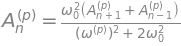

In [68]:
newton_substituidoPaso3 = sym.Eq(A_p_n, sym.solve(newton_substituidoPaso2, A_p_n)[0] )
newton_substituidoPaso3

In [52]:
newton_substituidoPaso2.rhs.args[2]

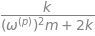

In [54]:
newton_substituidoPaso2.rhs.args[1]*(1/(1/k))

### Relación de dispersión